Проект 2. Разведывательный анализ данных. Итоговое задание

1 school — аббревиатура школы, в которой учится ученик
2 sex — пол ученика ('F' - женский, 'M' - мужской)
3 age — возраст ученика (от 15 до 22)
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
16 schoolsup — дополнительная образовательная поддержка (yes или no)
17 famsup — семейная образовательная поддержка (yes или no)
18 paid — дополнительные платные занятия по математике (yes или no)
19 activities — дополнительные внеучебные занятия (yes или no)
20 nursery — посещал детский сад (yes или no)
21 higher — хочет получить высшее образование (yes или no)
22 internet — наличие интернета дома (yes или no)
23 romantic — в романтических отношениях (yes или no)
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28 absences — количество пропущенных занятий
29 score — баллы по госэкзамену по математике

Цель: отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска
Задачи:
1.	Первичная обработка данных
2.	Устранить выбросы в числовых переменных
3.	Оценить количество уникальных значений для номинативных переменных
4.	Преобразовать данные при необходимости
5.	Провести корреляционный анализ количественных переменных
6.	Отобрать не коррелирующие переменные
7.	Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину
8.	Сформулировать выводы относительно качества даннызи тех переменных, которые будут использоваться в дальнейшем

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # выведем больше строк
pd.set_option('display.max_columns', 50)  # выведем больше колонок

math = pd.read_csv('stud_math.csv')

display(math.head(10))
math.info()

# В датасете только 3 колонки без пропусков. Одна лишняя колонка.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [72]:
# 1. Первичная обработка данных

In [73]:
# Лишний столбец с непонятной информацией 'studytime, granular'.
# Шкалы интерпритации результатов нет
display(pd.DataFrame(math['studytime, granular'].value_counts()))

# Убираем его из датасета, как непроверенную информацию
del math['studytime, granular']

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

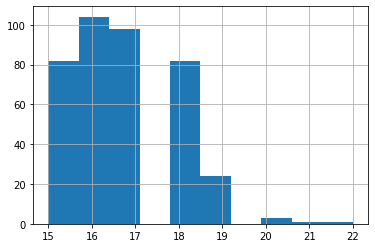

In [74]:
# 2.Проверим все столбцы на выбросы

# age
display(pd.DataFrame(math.age.value_counts()))
math.loc[:, ['age']].info()

# Этот столбец числовой и без пропусков.
# Поэтому посмотрим на его распределение:

math.age.hist()
math.age.describe()

In [75]:
# Medu
display(pd.DataFrame(math.Medu.value_counts()))
math.loc[:, ['Medu']].info()
# Этот столбец числовой, есть пропуски.

# Fedu
display(pd.DataFrame(math.Fedu.value_counts()))
math.loc[:, ['Fedu']].info()
# Этот столбец числовой, есть пропуски. Есть выбросы.

# traveltime
display(pd.DataFrame(math.traveltime.value_counts()))
math.loc[:, ['traveltime']].info()
# Этот столбец числовой, есть пропуски.

# studytime
display(pd.DataFrame(math.studytime.value_counts()))
math.loc[:, ['studytime']].info()
# Этот столбец числовой, есть пропуски.

# failures
display(pd.DataFrame(math.failures.value_counts()))
math.loc[:, ['failures']].info()
# Этот столбец числовой, есть пропуски.

# famrel
display(pd.DataFrame(math.famrel.value_counts()))
math.loc[:, ['famrel']].info()
# Этот столбец числовой, есть пропуски. Есть выбросы.

# freetime
display(pd.DataFrame(math.freetime.value_counts()))
math.loc[:, ['freetime']].info()
# Этот столбец числовой, есть пропуски.

# goout
display(pd.DataFrame(math.goout.value_counts()))
math.loc[:, ['goout']].info()
# Этот столбец числовой, есть пропуски.

# health
display(pd.DataFrame(math.health.value_counts()))
math.loc[:, ['health']].info()
# Этот столбец числовой, есть пропуски.

# absences
display(pd.DataFrame(math.absences.value_counts()))
math.loc[:, ['absences']].info()
# Этот столбец числовой, есть пропуски. Есть выбросы.

# score
display(pd.DataFrame(math.score.value_counts()))
math.loc[:, ['score']].info()
# Этот столбец числовой, есть пропуски. Есть выбросы в виде оценки 0.0

# В столбцах absences, famrel, Fedu убрать выбросы.

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [76]:
# 2. Устранение выбросов для числовых переменных

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

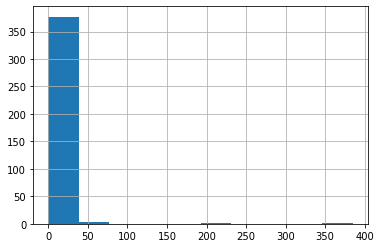

In [77]:
# absences
math.absences.hist()
math.absences.describe()

# Большая часть значений находится в диапозоне до 20 прогулов

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


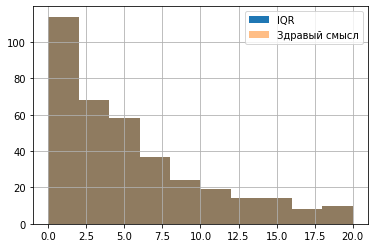

In [78]:
# рассмотрим распределение более подробно, определим границы выбросов.
# ГРаницы выбросов составили: -12, 20. Оставим только тех, у кого 20 и меньше пропусков.

median = math.absences.median()
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
math.absences.loc[math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 20),
                                                                                  label='IQR')
math.absences.loc[math.absences <= 75].hist(alpha=0.5, bins=10, range=(0, 20),
                                            label='Здравый смысл')
plt.legend()

In [79]:
# Оставим только те значения, которые меньше 20
math = math.loc[math.absences <= 20]

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


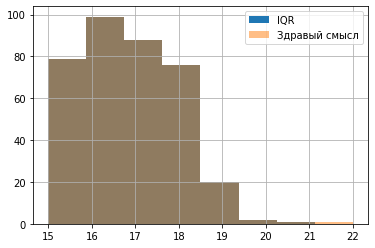

In [80]:
# age

# ГРаницы выбросов составили: 13, 21. Оставим только тех, у кого 21 и меньше пропусков.

median = math.age.median()
IQR = math.age.quantile(0.75) - math.age.quantile(0.25)
perc25 = math.age.quantile(0.25)
perc75 = math.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
math.age.loc[math.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=8, range=(15, 22),
                                                                        label='IQR')
math.age.loc[math.age <= 75].hist(alpha=0.5, bins=8, range=(15, 22),
                                  label='Здравый смысл')
plt.legend()

In [81]:
# Оставим только те значения, которые меньше или равны 21 лет.
math = math.loc[math.age <= 21]

In [82]:
# 3. Оцениваем количество уникальных значений для нооминативных переменных

In [83]:
# famrel

# Уберем значение равное -1.0. Т.к. используется шкала от 1 до 5
math = math.loc[math.famrel >= 1]

In [84]:
# Fedu
# Уберем значение больше 4.0 Т.к. используется шкала от 0 до 4
math = math.loc[math.Fedu <= 4]

In [85]:
# 4. Преобразовываем данные

In [86]:
# Обработка номинативных данных

# напишем функцию для замены NaN на None для dtype(object)


def fix_nan(x):
    if pd.isnull(x):
        return None
    if x == 'nan':
        return None
    return x

In [87]:
# убираем пропуски во всех колонках
math.address = math.address.apply(fix_nan).sort_values()
math.famsize = math.famsize.apply(fix_nan).sort_values()
math.Pstatus = math.Pstatus.apply(fix_nan).sort_values()
math.Mjob = math.Mjob.apply(fix_nan).sort_values()
math.Fjob = math.Fjob.apply(fix_nan).sort_values()
math.reason = math.reason.apply(fix_nan).sort_values()
math.guardian = math.guardian.apply(fix_nan).sort_values()
math.famsup = math.famsup.apply(fix_nan).sort_values()
math.paid = math.paid.apply(fix_nan).sort_values()
math.activities = math.activities.apply(fix_nan).sort_values()
math.nursery = math.nursery.apply(fix_nan).sort_values()
math.higher = math.higher.apply(fix_nan).sort_values()
math.internet = math.internet.apply(fix_nan).sort_values()
math.romantic = math.romantic.apply(fix_nan).sort_values()

In [88]:
# Убираем в датасете строки с пустыми занчениями в колонке score
math2 = math.dropna(subset=['score'])

In [89]:
# Убираем значения score = 0
math2 = math2.loc[math.score != 0]

In [91]:
# 5. Проводим корреляционный анализ количественных переменных

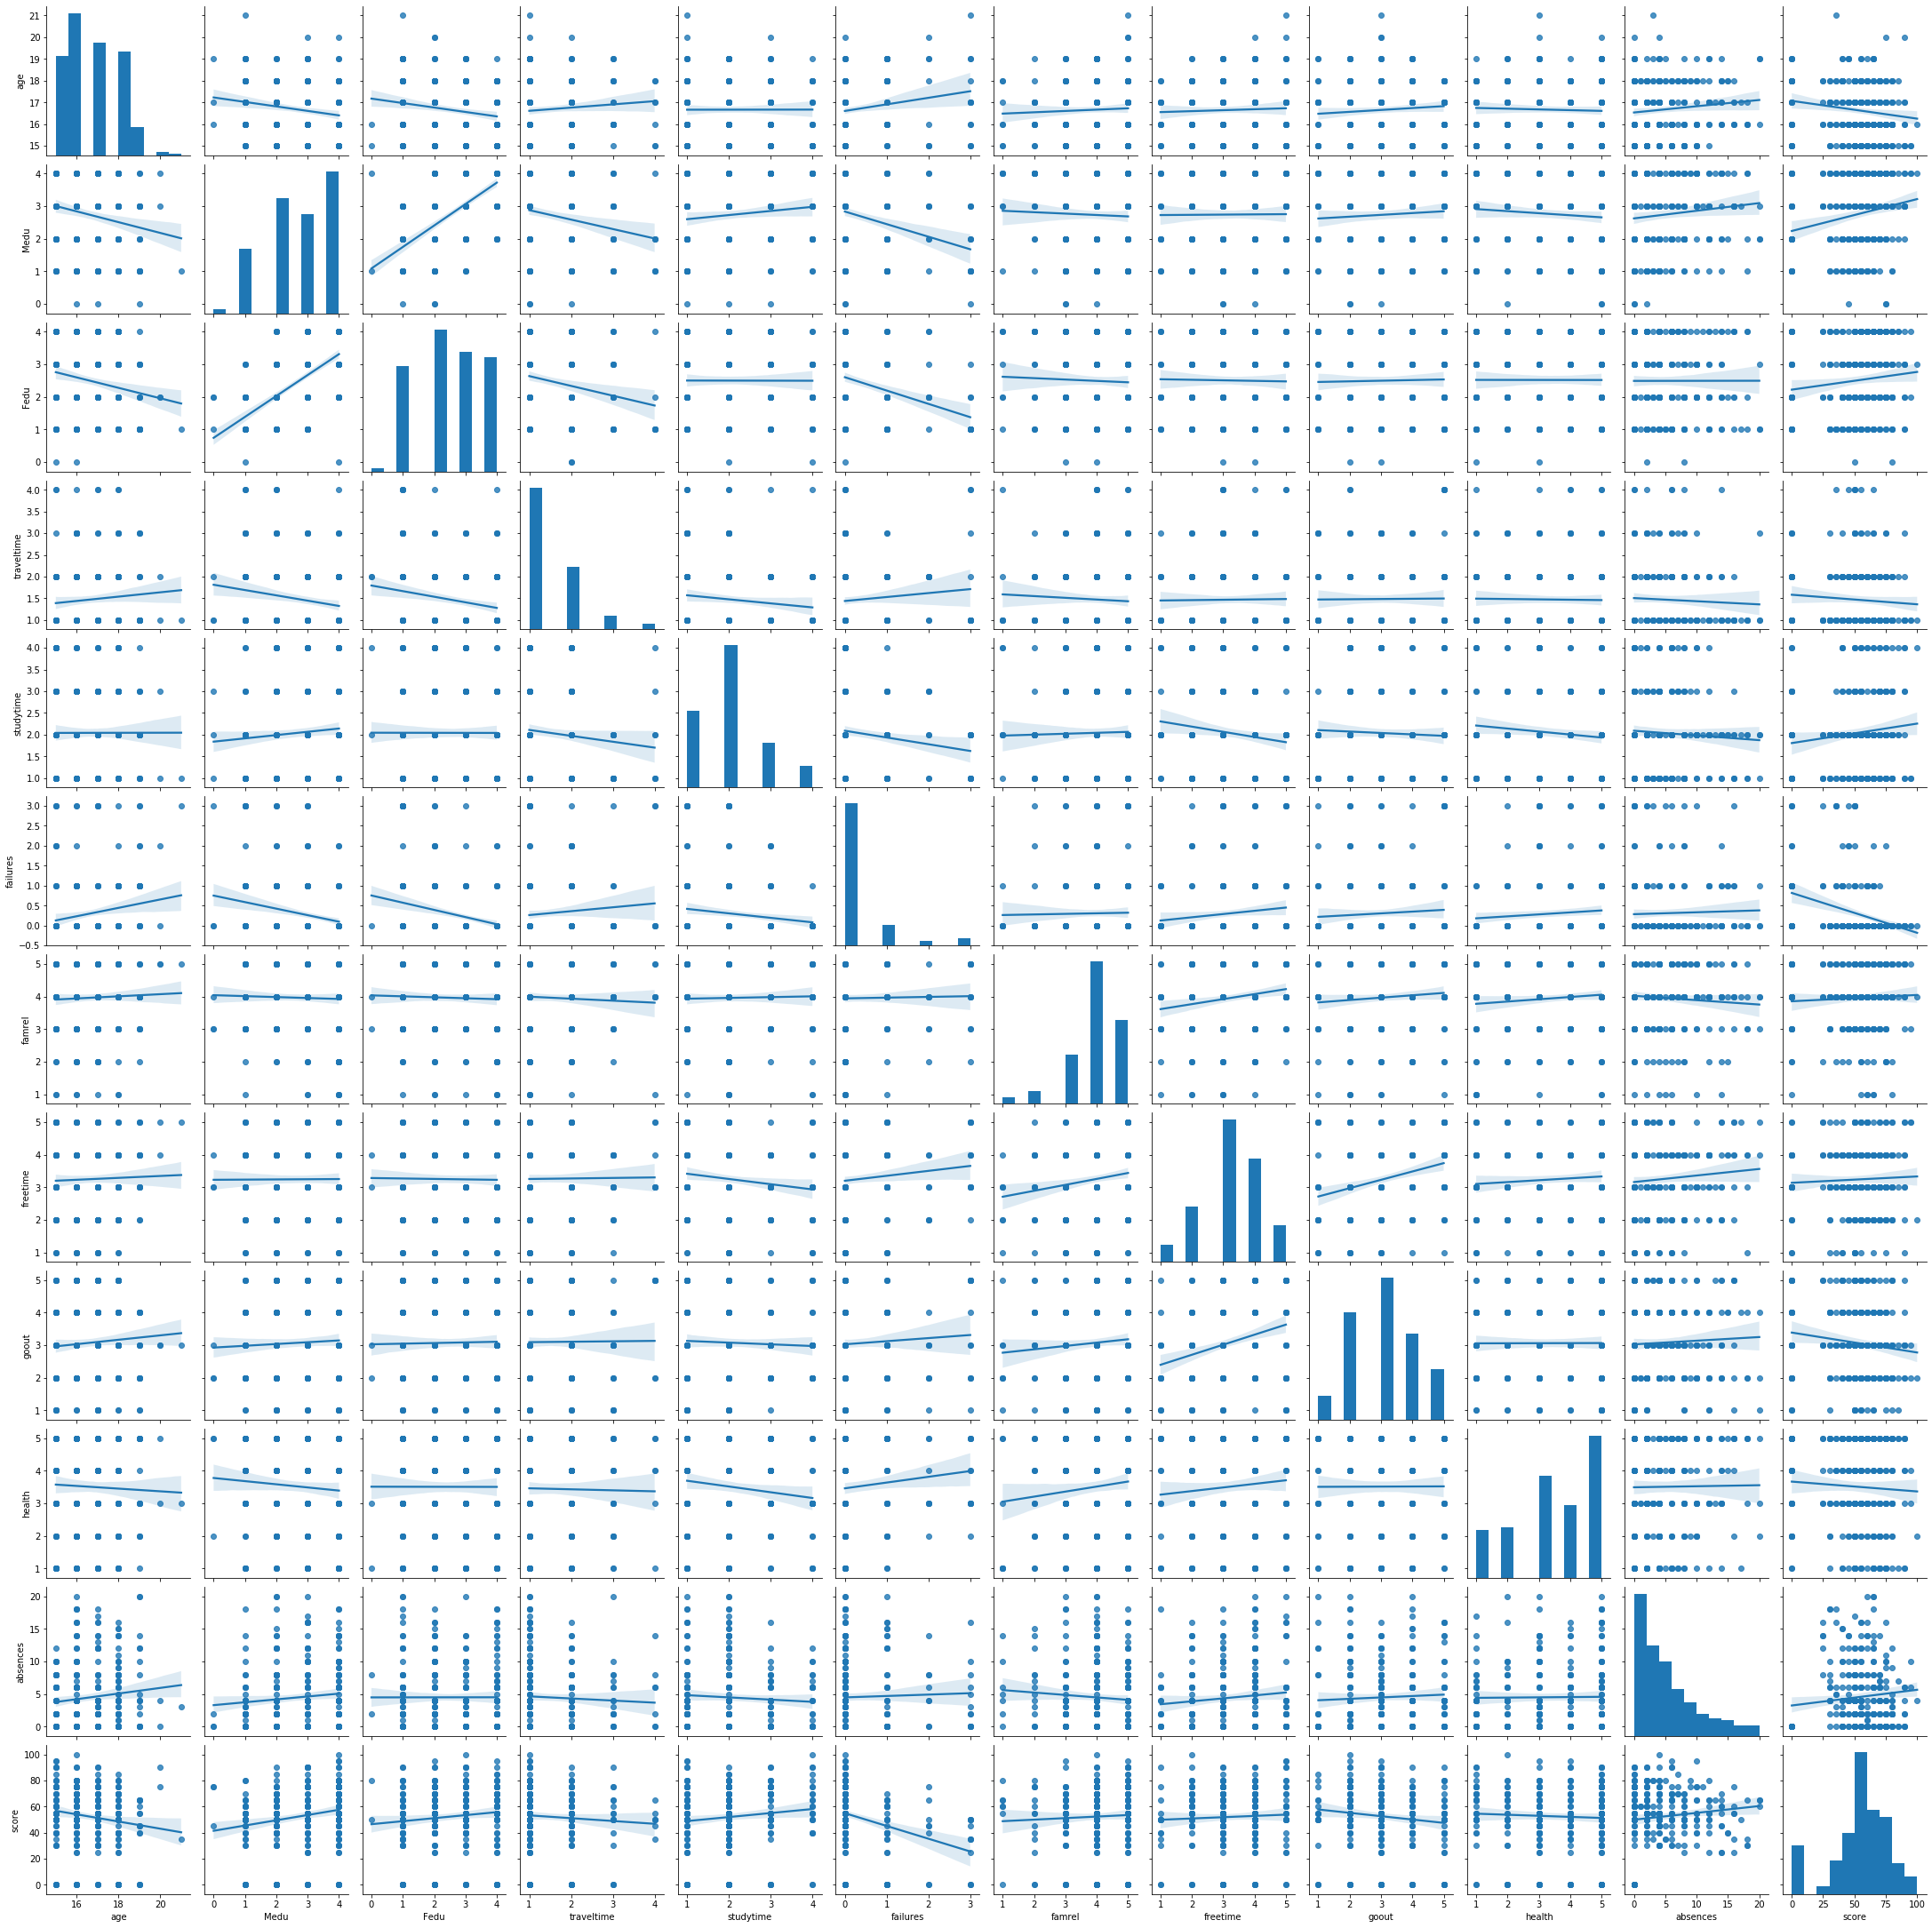

In [92]:
# строим график pairplot
sns.pairplot(math, kind='reg')

In [93]:
# 6. создаем матрицу корреляций для числовых столбцов

# уберем нечисловые стлбцы
math_number = math2.drop(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                          'activities', 'nursery', 'higher', 'internet', 'romantic', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health'], axis=1)

# строим таблицу корреляционного анализа
math_number.corr()

# вывод: числовые столбцы не коррелируют между собой, оставим все значения для дальнейшего анализа.

,age,failures,absences,score
age,1.000000,0.190510,0.162196,-0.127516
failures,0.190510,1.000000,0.108628,-0.250302
absences,0.162196,0.108628,1.000000,-0.187597
score,-0.127516,-0.250302,-0.187597,1.000000


In [94]:
# 7.Анализ номинативных переменных с помощью боксплотов (функция)
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=math2.loc[math2.loc[:, column].isin(
                    math2.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

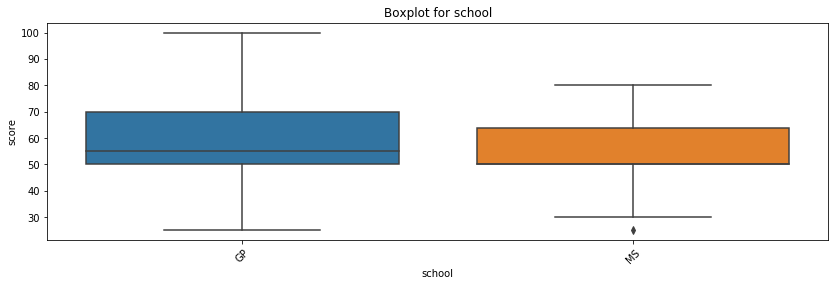

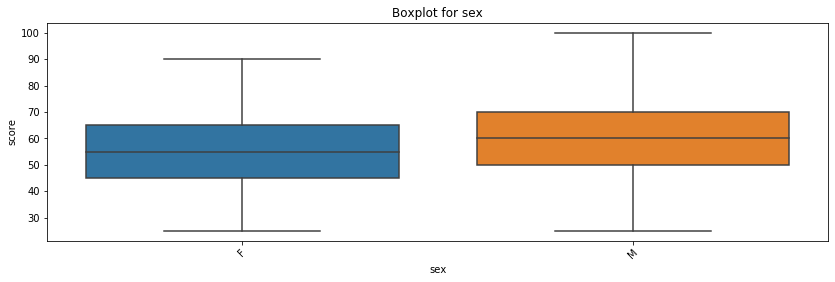

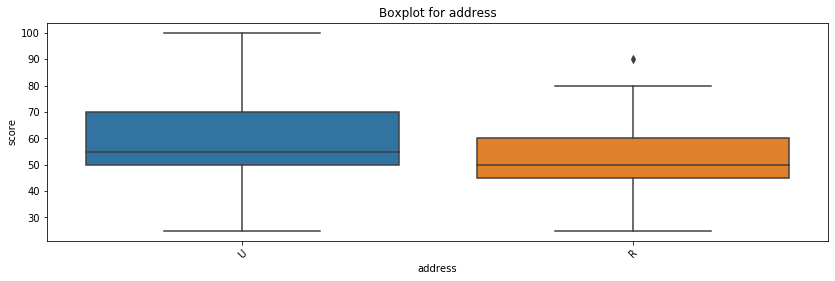

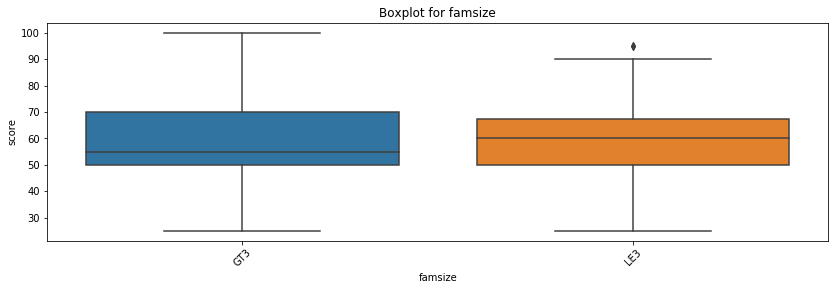

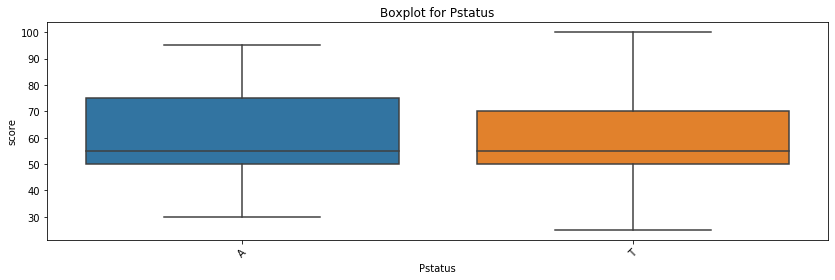

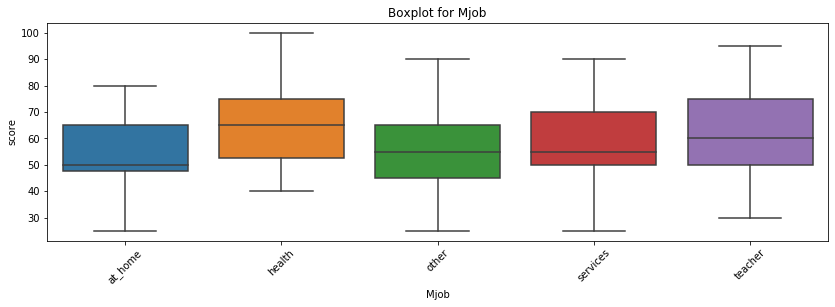

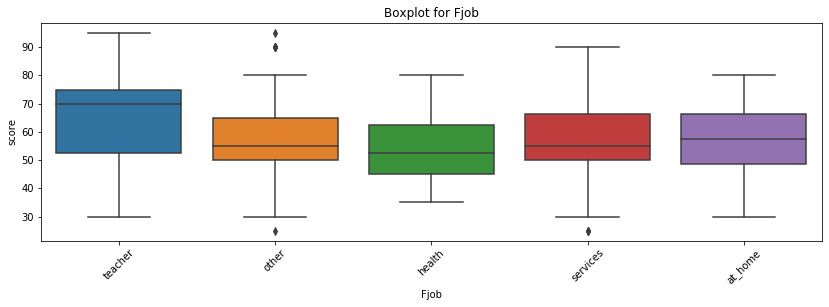

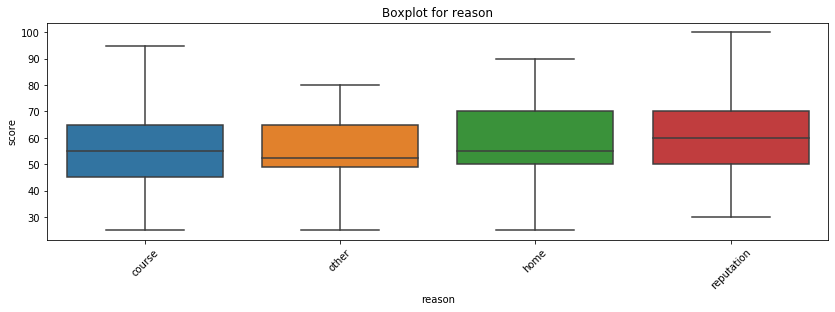

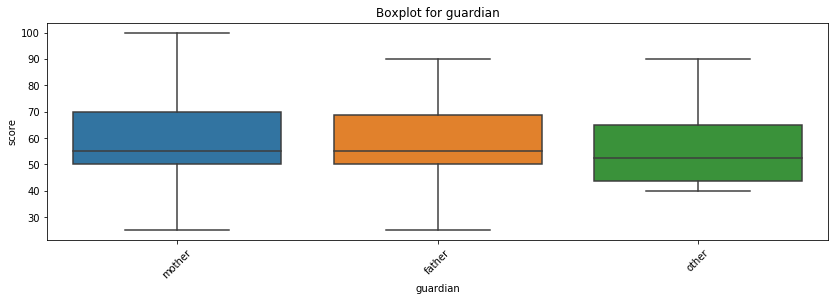

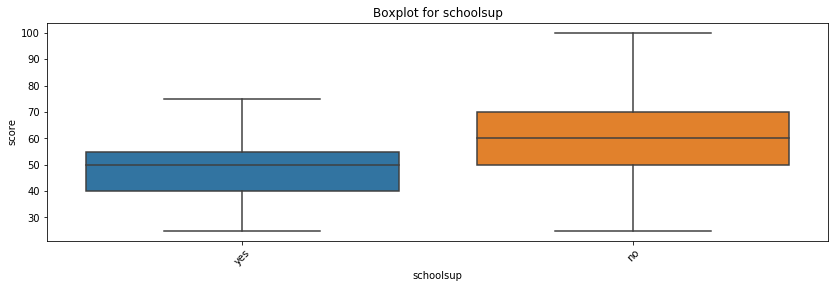

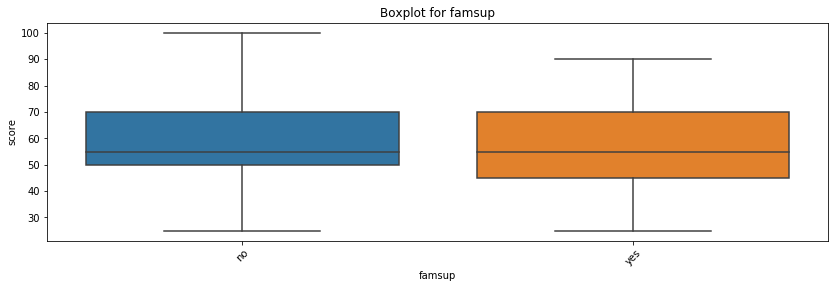

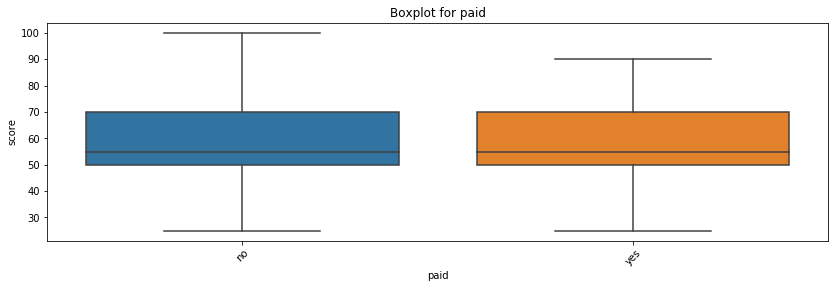

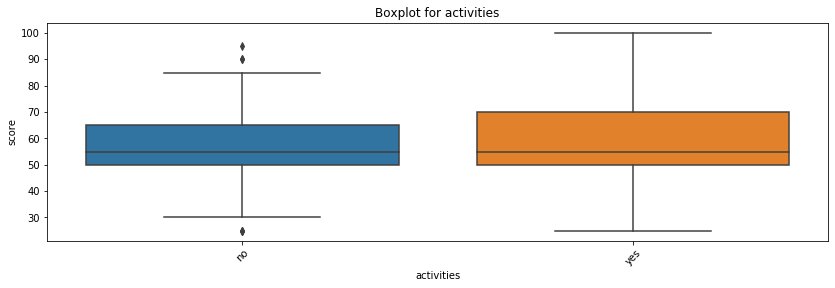

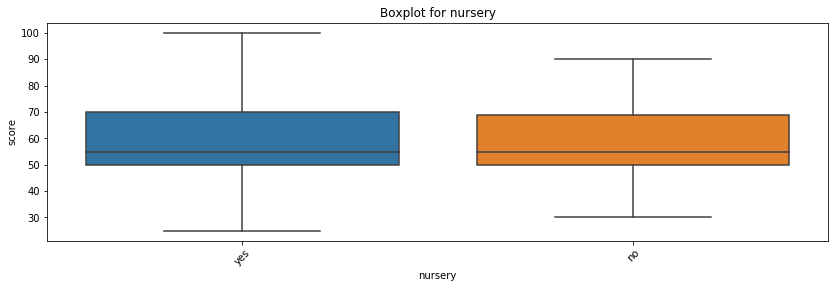

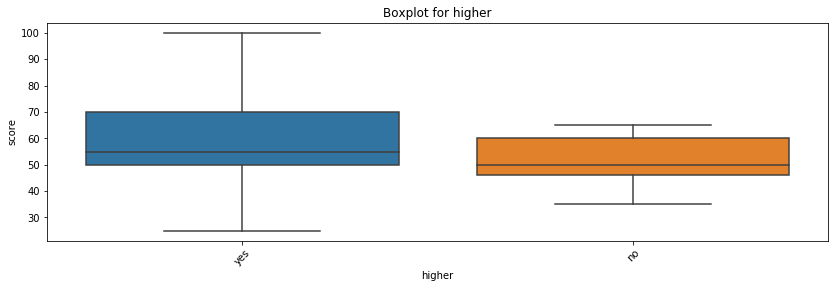

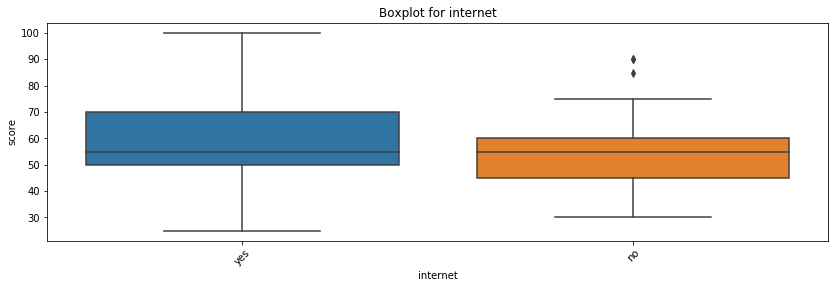

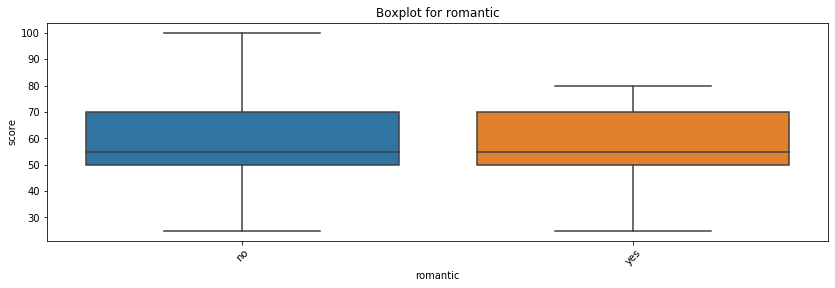

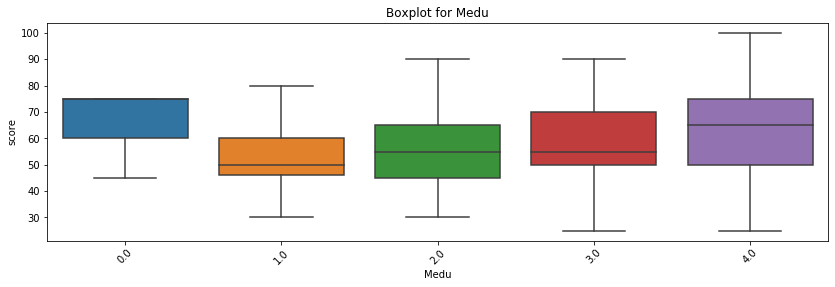

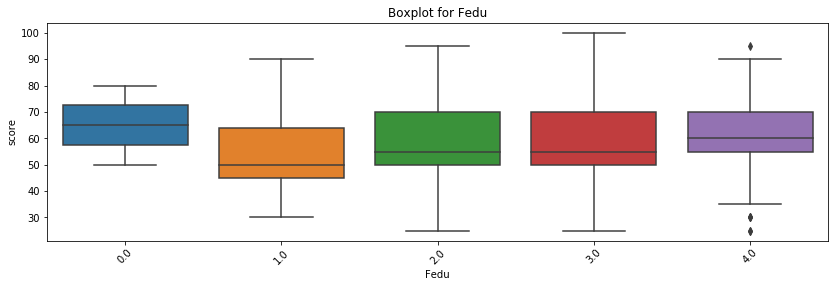

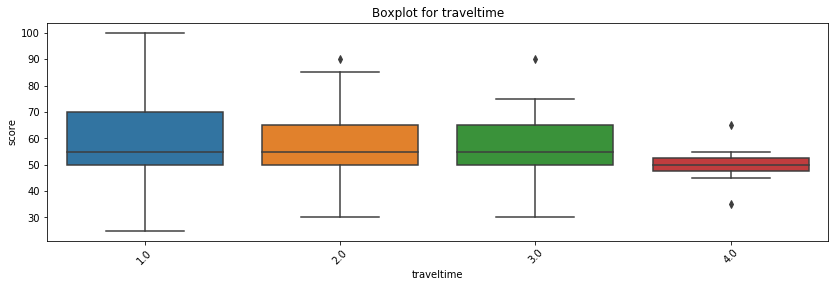

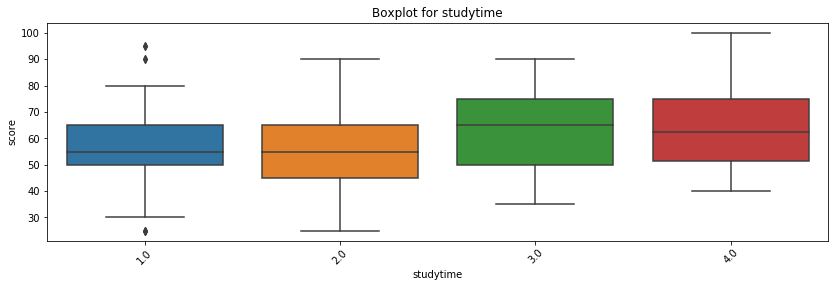

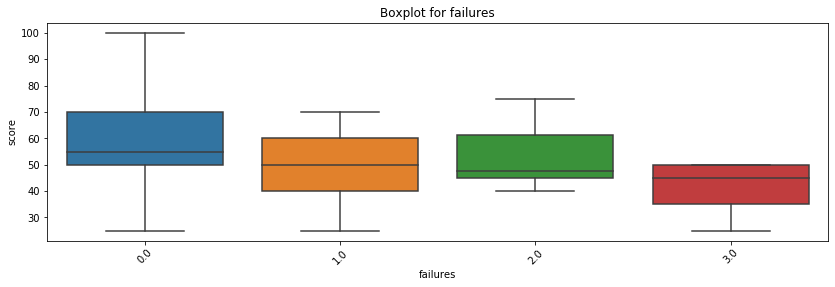

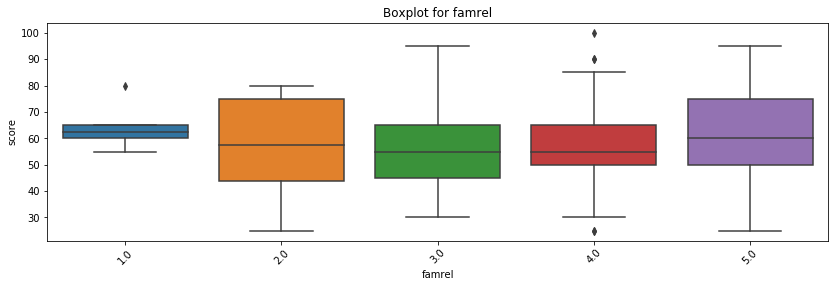

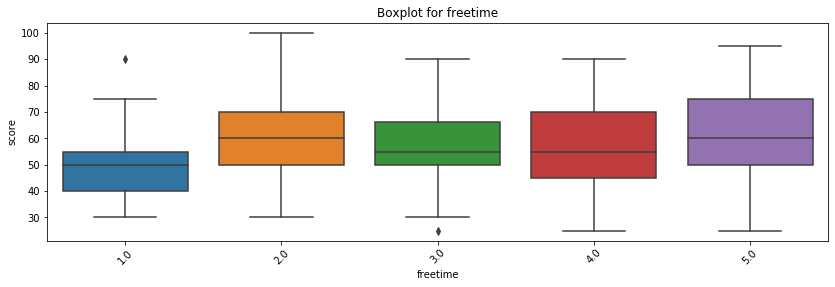

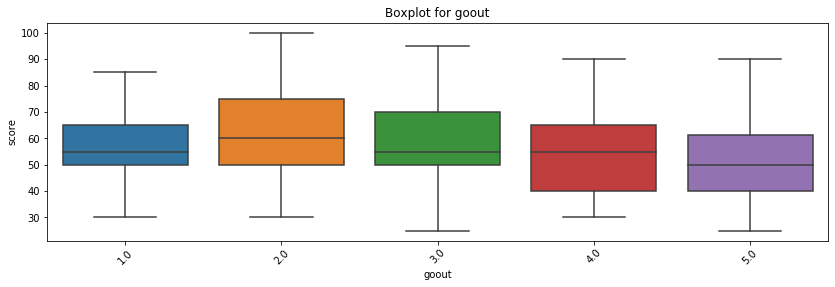

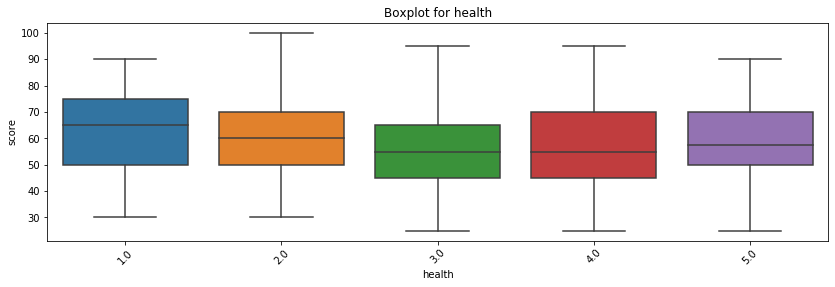

In [95]:
# выводим боксплоты
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 
            'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
            'activities', 'nursery', 'higher', 'internet', 'romantic', 
            'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

In [96]:
# 8. с помощью критерия Стьюдента смотрим влияние номинативных переменных на score (функция)
def get_stat_dif(column):
    cols = math2.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math2.loc[math2.loc[:, column] == comb[0], 'score'],
                     math2.loc[math2.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [97]:
# применение функции
for col in ['school', 'sex', 'address', 'famsize', 
            'Pstatus', 'Mjob', 'Fjob', 'reason', 
            'guardian', 'schoolsup', 'famsup', 'paid', 
            'activities', 'nursery', 'higher', 'internet', 
            'romantic', 'Medu', 'Fedu', 'traveltime', 
            'studytime', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

# Вывод: имеют статистически значимые различия для колонок sex, address, Mjob, schoolsup, studytime, goout

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки studytime


In [98]:
# 9. оставляем в модели только те переменные, которые могут влиять на переменную score
math_for_model = math2.loc[:, ['age', 'sex', 'address', 'Mjob',
                               'Medu', 'schoolsup', 'studytime', 
                               'failures', 'absences', 'score']]
math_for_model.head()

,age,sex,address,Mjob,Medu,schoolsup,studytime,failures,absences,score
0,18,F,U,at_home,4.0,yes,2.0,0.0,6.0,30.0
1,17,F,U,at_home,1.0,no,2.0,0.0,4.0,30.0
2,15,F,U,at_home,1.0,yes,2.0,3.0,10.0,50.0
3,15,F,U,health,4.0,no,3.0,0.0,2.0,75.0
4,16,F,U,other,3.0,no,2.0,0.0,4.0,50.0


In [99]:
# записываем данные в excel
# math_for_model.to_excel("Project2.xlsx",sheet_name='Лист1')